In [2]:
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras


2023-11-14 10:32:35.617456: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-14 10:32:35.772114: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-14 10:32:35.772160: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-14 10:32:35.773144: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-14 10:32:35.869650: I tensorflow/core/platform/cpu_feature_g

In [3]:
class BloodCell:
    def __init__(self, name, subtype, normal_range, rgb_colors, dominant_color, coordinates, area):
        self.name = name
        self.subtype = subtype
        self.normal_range = normal_range
        self.rgb_colors = rgb_colors
        self.dominant_color = dominant_color
        self.coordinates = coordinates
        self.area = area
    
    def __str__(self):
        return f"Blood Cell: {self.name}\nSubtype: {self.subtype}\nNormal Range: {self.normal_range}\nRGB Colors: {self.rgb_colors}\nDominant Color: {self.dominant_color}\nCoordinates: {self.coordinates}\nArea: {self.area}"


basophil = BloodCell("Базофил", "Подтип лейкоцитов", "0-200", {"R": 255, "G": 0, "B": 0}, "Красный", [(10, 20), (30, 40)], 100)
print(basophil)
eosinophil = BloodCell("Эозинофилы", "Подтип лейкоцитов", "40000-50000", {"R": 255, "G": 0, "B": 0}, "Красный", [(10, 20), (30, 40)], 100)
print(eosinophil)
erythroblast = BloodCell("Эритробласт", "Не подтип лейкоцитов", "3.8*10**6-5.2*10**6", {"R": 255, "G": 0, "B": 0}, "Красный", [(10, 20), (30, 40)], 100)
print(erythroblast)
immunoglobulin= BloodCell("Иммуноглобины", "Гликопротеиновые молекулы", "", {"R": 255, "G": 0, "B": 0}, "Красный", [(10, 20), (30, 40)], 100)
print(immunoglobulin)
lymphocyte = BloodCell("Лимфоциты", "Подтип лейкоцитов", "1500-3000", {"R": 0, "G": 0, "B": 255}, "Синий", [(10, 20), (30, 40)], 100)
print(lymphocyte)
monocyte = BloodCell("Моноцит", "Подтип лейкоцитов", "300-900", {"R": 153, "G": 102, "B": 204}, "Синий", [(10, 20), (30, 40)], 100)
print(monocyte)
neutrophil= BloodCell("Нейтрофилы", "Полиморфно-ядерные лейкоциты", "2300-8100", {"R": 255, "G": 192, "B": 203}, "Красный", [(10, 20), (30, 40)], 100)
print(neutrophil)
platelet = BloodCell("Тромбоциты", "Тип мегакариоцитов", "150000-450000", {"R": 197, "G": 29, "B": 52}, "Красный", [(10, 20), (30, 40)], 100)
print(platelet)
erythrocyte= BloodCell("Эритроцит", "Подтип лейкоцитов", "3.9*10**6-5.5*10**6", {"R": 128, "G": 0, "B": 128}, "сине-красный", [(10, 20), (30, 40)], 100)
print(erythrocyte)

Blood Cell: Базофил
Subtype: Подтип лейкоцитов
Normal Range: 0-200
RGB Colors: {'R': 255, 'G': 0, 'B': 0}
Dominant Color: Красный
Coordinates: [(10, 20), (30, 40)]
Area: 100
Blood Cell: Эозинофилы
Subtype: Подтип лейкоцитов
Normal Range: 40000-50000
RGB Colors: {'R': 255, 'G': 0, 'B': 0}
Dominant Color: Красный
Coordinates: [(10, 20), (30, 40)]
Area: 100
Blood Cell: Эритробласт
Subtype: Не подтип лейкоцитов
Normal Range: 3.8*10**6-5.2*10**6
RGB Colors: {'R': 255, 'G': 0, 'B': 0}
Dominant Color: Красный
Coordinates: [(10, 20), (30, 40)]
Area: 100
Blood Cell: Иммуноглобины
Subtype: Гликопротеиновые молекулы
Normal Range: 
RGB Colors: {'R': 255, 'G': 0, 'B': 0}
Dominant Color: Красный
Coordinates: [(10, 20), (30, 40)]
Area: 100
Blood Cell: Лимфоциты
Subtype: Подтип лейкоцитов
Normal Range: 1500-3000
RGB Colors: {'R': 0, 'G': 0, 'B': 255}
Dominant Color: Синий
Coordinates: [(10, 20), (30, 40)]
Area: 100
Blood Cell: Моноцит
Subtype: Подтип лейкоцитов
Normal Range: 300-900
RGB Colors: {'R': 

In [4]:
Bloodcells = {
                     0: basophil.name,
                     1: eosinophil.name,
                     2: erythroblast.name,
                     3: immunoglobulin.name,
                     4: lymphocyte.name,
                     5: monocyte.name,
                     6: neutrophil.name,
                     7: platelet.name
                   }

In [5]:
image_generator = ImageDataGenerator(rescale=1.0/255, validation_split=0.3)    

train_dataset = image_generator.flow_from_directory(batch_size=32,
                                                 directory='input/bloodcells_dataset',
                                                 target_size=(300, 300),  
                                                 subset="training",
                                                 class_mode='categorical',
                                                 shuffle=True,
                                                 classes=('basophil', 
                                                          'eosinophil', 
                                                          'erythroblast', 
                                                          'ig', 
                                                          'lymphocyte', 
                                                          'monocyte', 
                                                          'neutrophil', 
                                                          'platelet')
                                                 )


validation_dataset = image_generator.flow_from_directory(batch_size=32,
                                                 directory='input/bloodcells_dataset',
                                                 target_size=(300, 300), 
                                                 subset="validation",
                                                 class_mode='categorical',
                                                 shuffle=True,
                                                 classes=('basophil', 
                                                          'eosinophil', 
                                                          'erythroblast', 
                                                          'ig', 
                                                          'lymphocyte', 
                                                          'monocyte', 
                                                          'neutrophil', 
                                                          'platelet')
                                                )
                                                

Found 11967 images belonging to 8 classes.
Found 5125 images belonging to 8 classes.


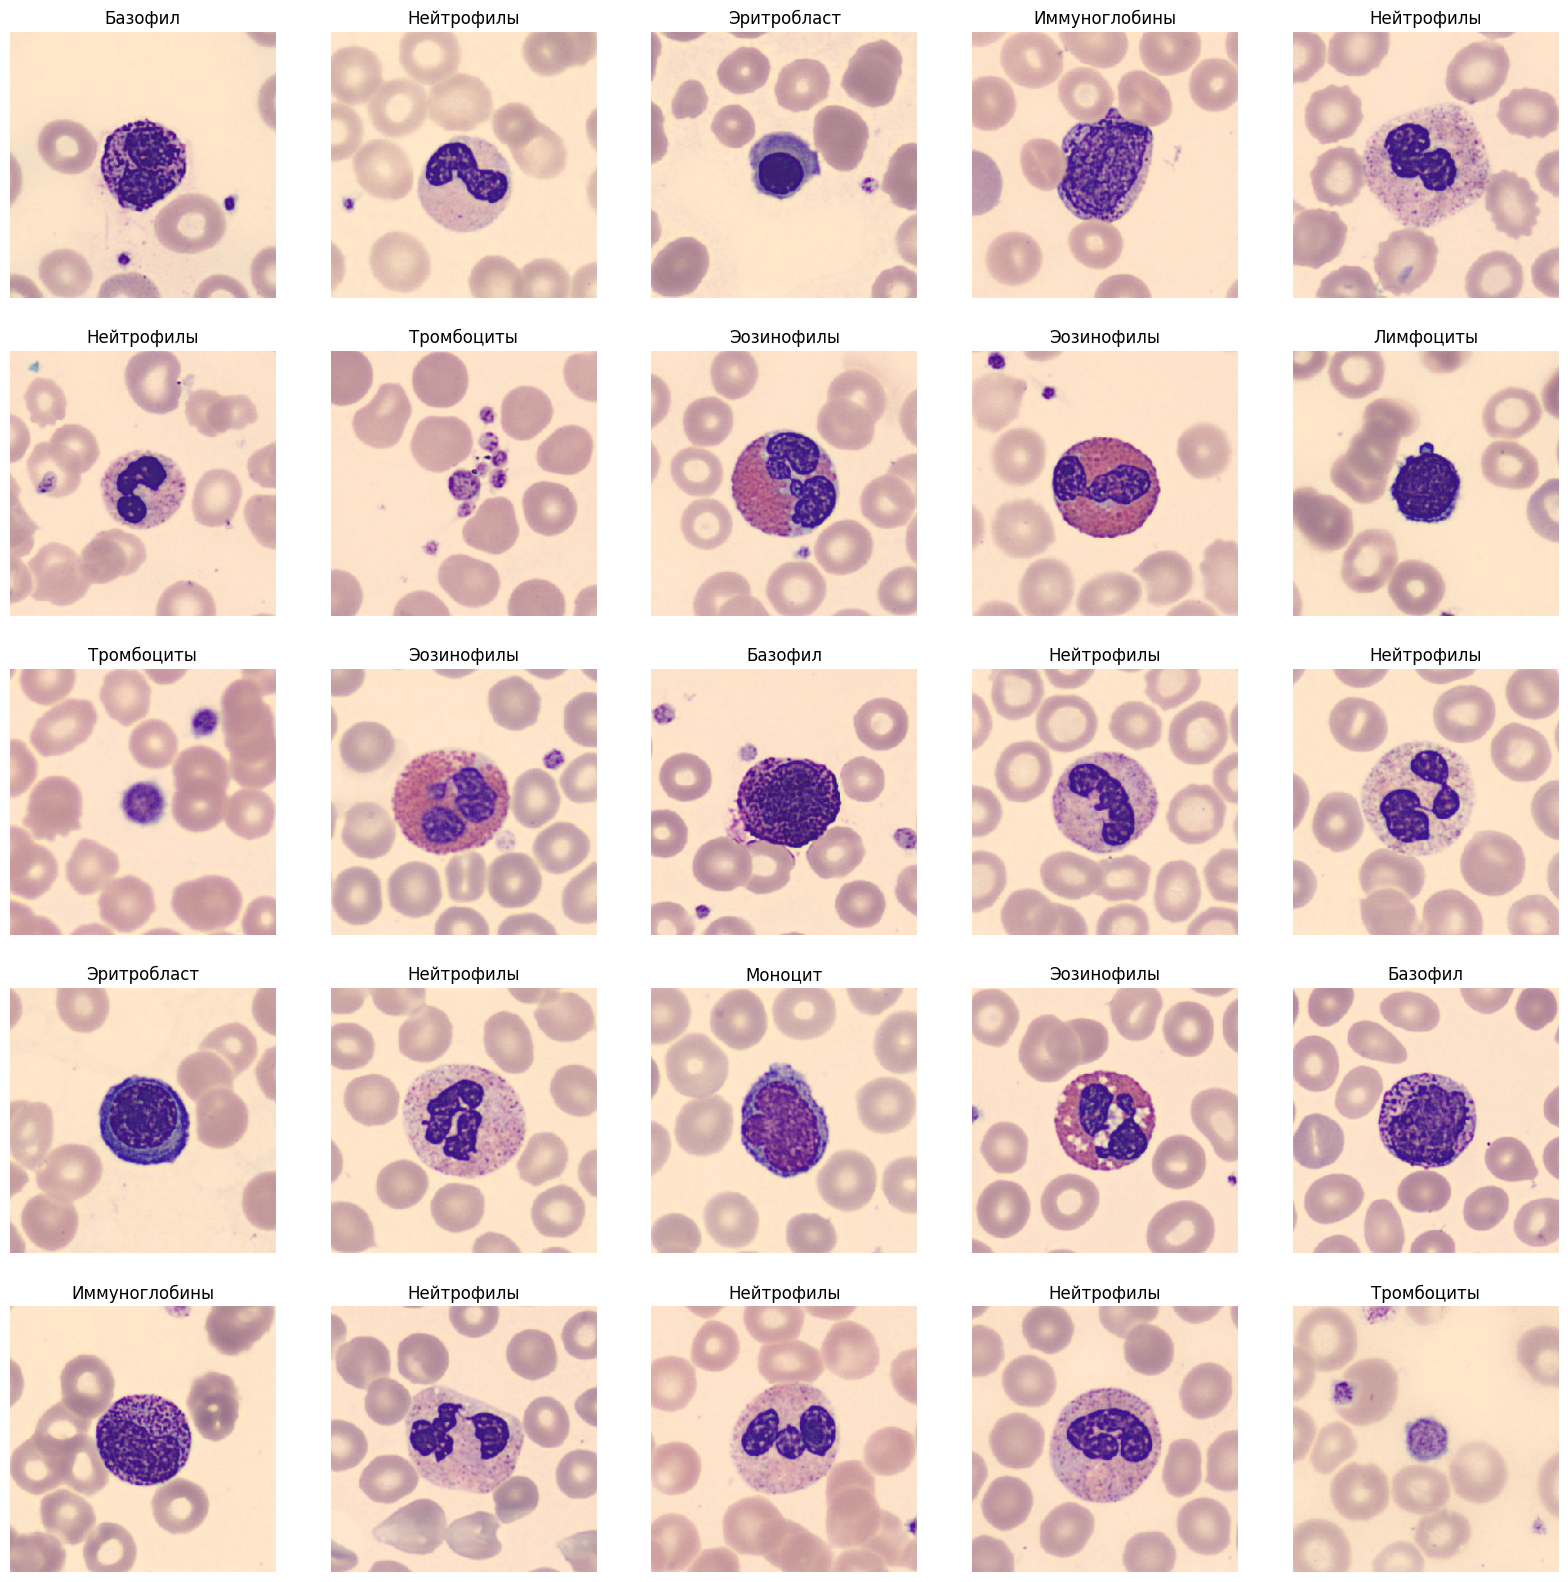

In [6]:

plt.figure(figsize=(20, 20))
plot_dim = 5
counter = 1

for img in train_dataset:
    
    plt.subplot(plot_dim, plot_dim, counter)
    plt.axis('off')
    plt.imshow(img[0][0]) 
    plt.title(Bloodcells[np.argmax(img[-1])])
    
    if counter >= plot_dim ** 2:
        break
    else:
        counter += 1
plt.savefig('img.png')

In [7]:
# Создаем экземпляр нейронки

NeuralNetwork = keras.models.Sequential()
NeuralNetwork.add(keras.Input(shape=(300, 300, 3)))
#Convolution layers

NeuralNetwork.add(keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape = (300, 300, 3)))
#Pooling layers

NeuralNetwork.add(keras.layers.MaxPooling2D(2, padding='same'))
#Reshaping layers

NeuralNetwork.add(keras.layers.Flatten())
#Core layers

NeuralNetwork.add(keras.layers.Dense(64, activation='relu'))
NeuralNetwork.add(keras.layers.Dense(64, activation='relu'))
NeuralNetwork.add(keras.layers.Dense(8, activation='softmax'))
NeuralNetwork.summary()
NeuralNetwork.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 300, 300, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 150, 150, 32)      0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 720000)            0         
                                                                 
 dense (Dense)               (None, 64)                46080064  
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 8)                 520       
                                                        

2023-11-14 10:32:55.037283: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-14 10:32:55.050306: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-14 10:32:55.050432: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [11]:
#Обучаем нейроночку
NeuralNetwork.fit(train_dataset, epochs=12, steps_per_epoch=300, validation_data=validation_dataset)

Epoch 1/16
300/300 [==============================] - 18s 60ms/step - loss: 0.2782 - accuracy: 0.9063 - val_loss: 0.5204 - val_accuracy: 0.8123
Epoch 2/16
300/300 [==============================] - 21s 69ms/step - loss: 0.2205 - accuracy: 0.9290 - val_loss: 0.4866 - val_accuracy: 0.8373
Epoch 3/16
300/300 [==============================] - 20s 68ms/step - loss: 0.1674 - accuracy: 0.9450 - val_loss: 0.7686 - val_accuracy: 0.7725
Epoch 4/16
300/300 [==============================] - 19s 63ms/step - loss: 0.1217 - accuracy: 0.9604 - val_loss: 0.4860 - val_accuracy: 0.8478
Epoch 5/16
300/300 [==============================] - 18s 60ms/step - loss: 0.0842 - accuracy: 0.9753 - val_loss: 0.5741 - val_accuracy: 0.8353
Epoch 6/16
300/300 [==============================] - 19s 62ms/step - loss: 0.0718 - accuracy: 0.9787 - val_loss: 0.4847 - val_accuracy: 0.8527
Epoch 7/16
300/300 [==============================] - 19s 62ms/step - loss: 0.0424 - accuracy: 0.9878 - val_loss: 0.4668 - val_accuracy:

In [12]:

min_loss_train = min(NeuralNetwork .history.history['loss'])
min_loss_val = min(NeuralNetwork .history.history['val_loss'])               
max_accuracy_train = max(NeuralNetwork.history.history['accuracy'])
max_accuracy_val = max(NeuralNetwork .history.history['val_accuracy'])


print('Mininum of loss value from training dataset: ', round(min_loss_train, 4))
print('Mininum of loss value from validation dataset: ', round(min_loss_val, 4))
print()
print('Max accuracy from training dataset: ', round(max_accuracy_train*100, 2), '%')
print('Max accuracy from training dataset: ', round(max_accuracy_val*100, 2), '%')

Mininum of loss value from training dataset:  0.0065
Mininum of loss value from validation dataset:  0.4668

Max accuracy from training dataset:  99.92 %
Max accuracy from training dataset:  86.71 %


Text(0, 0.5, 'Loss function value')

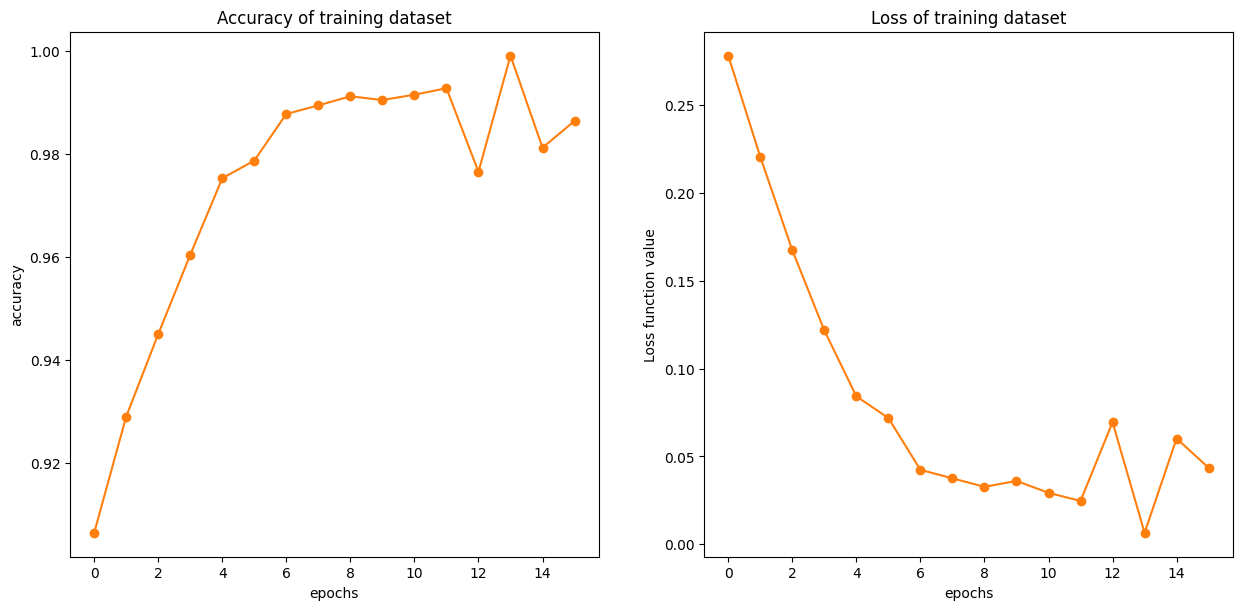

In [13]:
#NeuralNetwork = keras.models.load_model('NeuralNetwork_16_epoch.keras')

plt.figure(figsize=(15, 15))

plt.subplot(2, 2, 1)
plt.plot(NeuralNetwork.history.history['accuracy'], color='tab:orange', marker='o')
plt.title('Accuracy of training dataset')
plt.xlabel('epochs')
plt.ylabel('accuracy')

plt.subplot(2, 2, 2)
plt.plot(NeuralNetwork.history.history['loss'], color='tab:orange', marker='o')
plt.title('Loss of training dataset')
plt.xlabel('epochs')
plt.ylabel('Loss function value')



In [153]:
#  Сохраним экземпляр нейронки
NeuralNetwork.save('NeuralNetwork_16_epoch.keras')
#model_loaded = keras.models.load_model('NeuralNetwork_16_epoch.keras')

1
Found 1 images belonging to 1 classes.
1/1 [==============================] - 0s 41ms/step


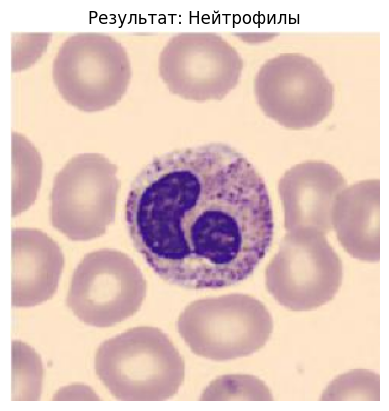

In [16]:
import time

image_generator = ImageDataGenerator(rescale=1.0/255, validation_split=0.3)   


while True:
    f = open('run.txt','r')
    line = f.readline()
    if line != '':
        print(1)
        break
    f.close()



time.sleep(5) 

test_dataset = image_generator.flow_from_directory(batch_size=32,
                                                 directory='/home/itech/Desktop/Project/neuroNetworking/flask/static/Image/',
                                                 target_size=(300, 300), 
                                                )
for img in test_dataset:
    plt.axis('off')
    plt.imshow(img[0][0]) 
    predict = Bloodcells[np.argmax(NeuralNetwork.predict(img[0])[0])]
    plt.title(f'Результат: {predict}')
    plt.savefig('static/Image/bloodcells_dataset/'+ line)
    break

f = open('run.txt','w')
f.write('')
f.close()



1/1 [==============================] - 0s 17ms/step


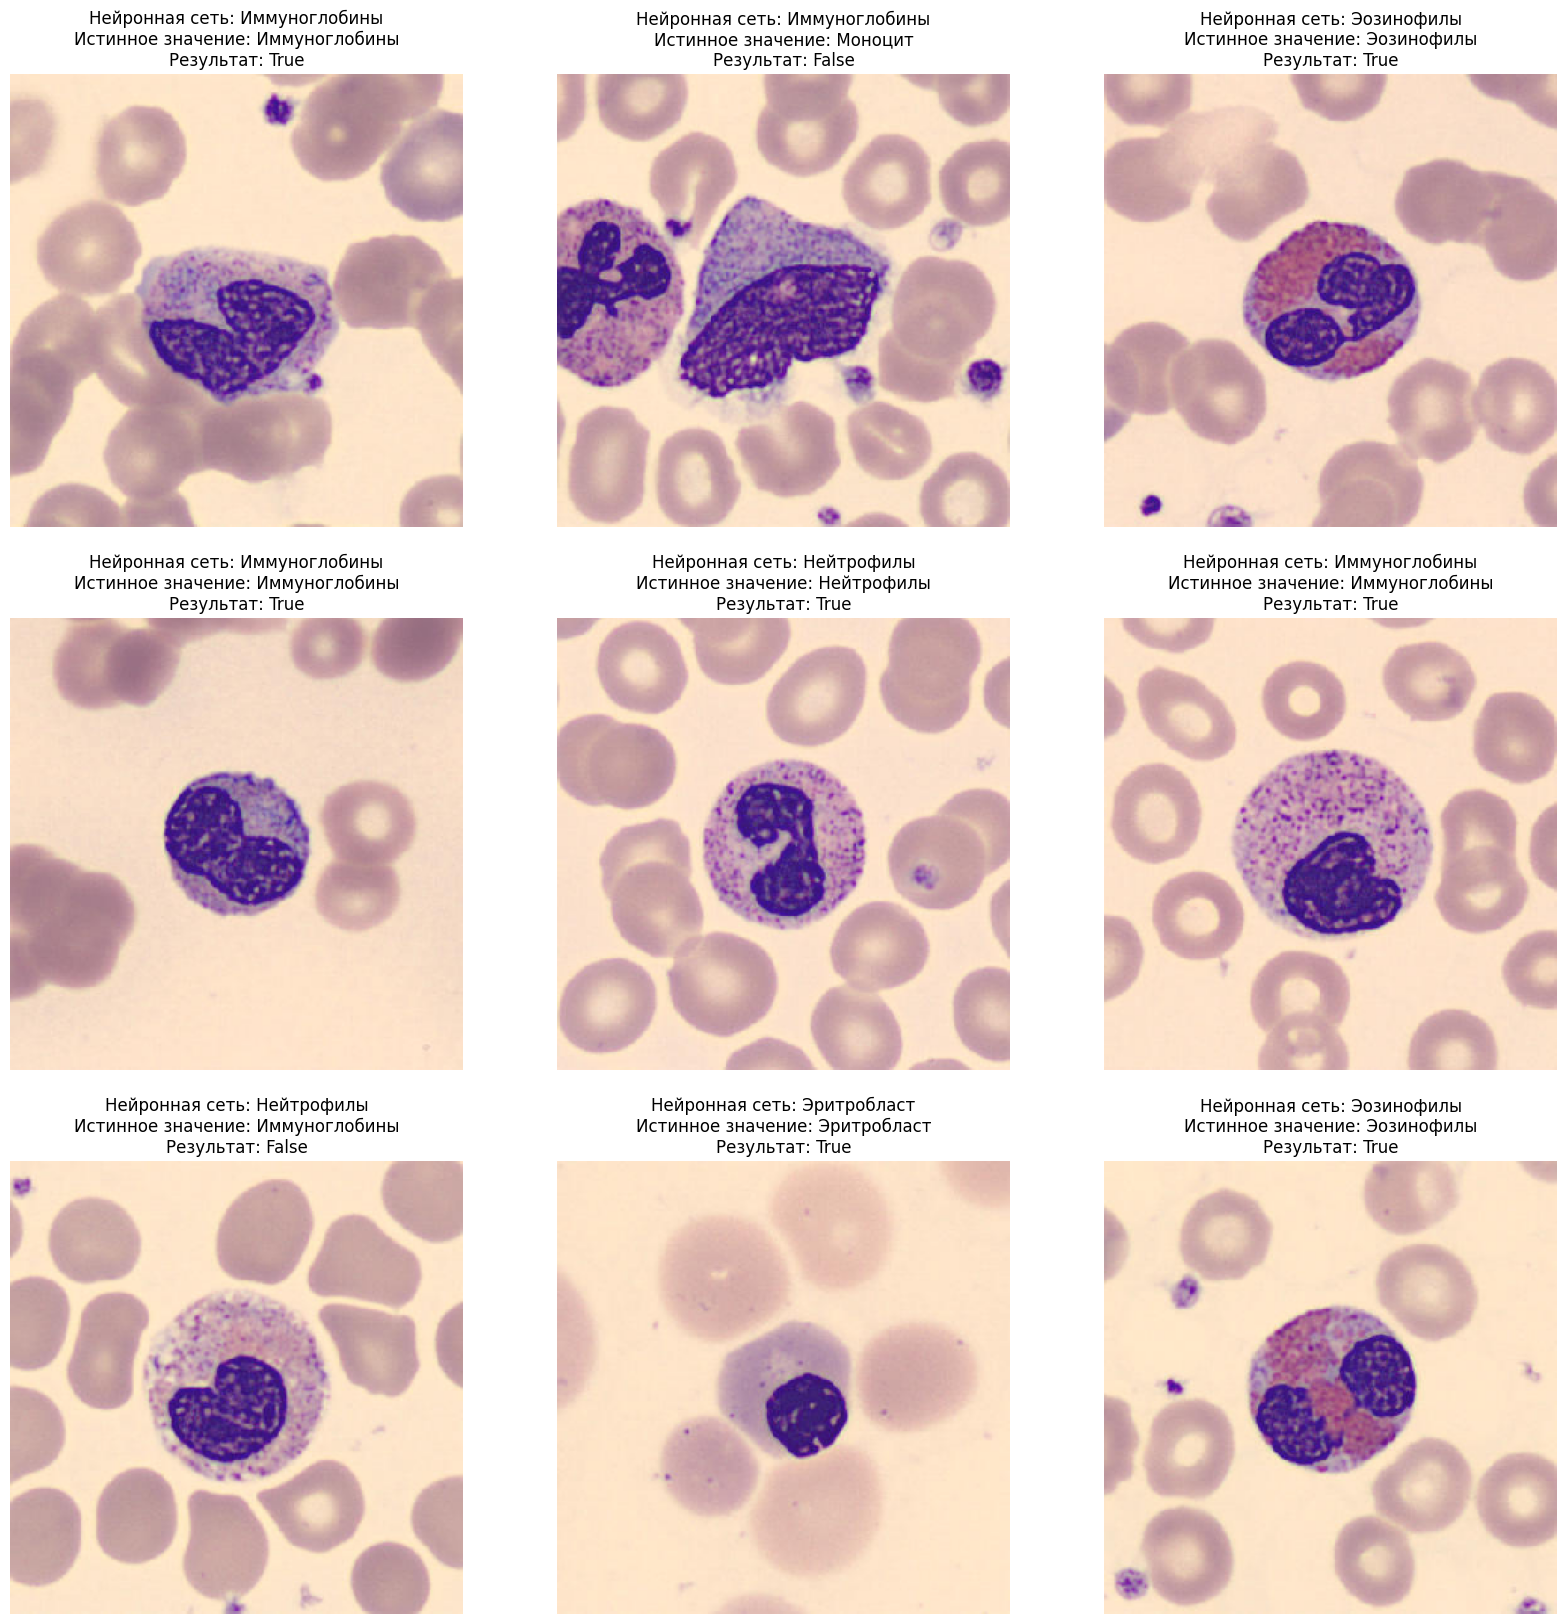

In [17]:
#Пример работы нейронки

plt.figure(figsize=(20, 20))
plot_dim = 3
counter = 1

for img in validation_dataset:
    plt.subplot(plot_dim, plot_dim, counter)
    plt.axis('off')
    plt.imshow(img[0][0]) 
    predict = Bloodcells[np.argmax(NeuralNetwork.predict(img[0])[0])]
    real_label = Bloodcells[np.argmax(img[-1])]
    state = True if (predict == real_label) else False
    plt.title(f'Нейронная сеть: {predict}\nИстинное значение: {real_label}\nРезультат: {state}')
    
    if counter >= plot_dim**2:
        break
    else:
        counter += 1